In [1]:
import pickle
with open("Data_preprocessing/example_pyg_surface_0.15.pkl", "rb") as f:
    example_pyg_list = pickle.load(f)

In [2]:
def pos_neg_num(pyg_list):
    pos_num = 0
    neg_num = 0
    for pyg in pyg_list:
        for y in pyg.y[pyg.train_mask]:
            if y == 1:
                pos_num+=1
            else:
                neg_num+=1
    return pos_num, neg_num

In [3]:
pos_neg_num(example_pyg_list)

(912, 12557)

roc_auc: 0.886056861413708


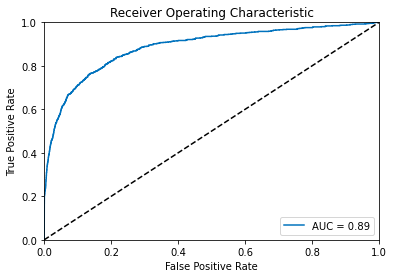

auc_precision_recall 0.5656994091804801


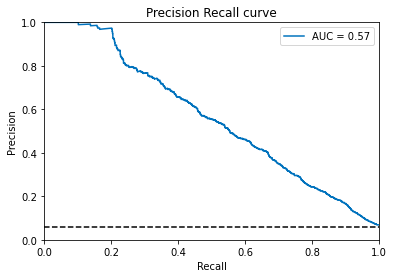

threshold 0.095
confusion_matrix : [[12206   351]
 [  467   445]]
f1 score : 0.52
BACC score : 0.73
AUC score : 0.73
MCC score : 0.49



In [5]:
from sklearn.metrics import (average_precision_score, precision_recall_curve, roc_curve,
                              confusion_matrix, f1_score, balanced_accuracy_score,
                              roc_auc_score, matthews_corrcoef, confusion_matrix, auc)
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from ensemble import ensemble
import torch

k = 15
self_w = 0.25
kfold = 5

direc = f'checkpoint'
dataset = example_pyg_list

true_label_list, pred_label_list = ensemble(direc, dataset, kfold, k=k+1, include_self=True, self_weight=self_w)


fpr, tpr, threshold = metrics.roc_curve(true_label_list, pred_label_list)
print("="*20)
#print("threshold:", threshold)
print("="*20)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc:", roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, '#0072BD', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


average_precision = average_precision_score(true_label_list, pred_label_list)

precision, recall, thresholds = precision_recall_curve(true_label_list, pred_label_list)
auc_precision_recall = auc(recall, precision)
print("auc_precision_recall", auc_precision_recall)
plt.plot(recall, precision, '#0072BD', label= "AUC = %0.2f"%auc_precision_recall)
plt.legend(loc='upper right')
plt.plot([0, 1], [0.06, 0.06],'k--')  #597, 3390
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall curve")
plt.show()


threshold = 0.095
print("threshold", threshold)
pred_label_binary_list = []

for pred in pred_label_list:
    if pred > threshold:
        pred_label_binary_list.append(1)
    else:
        pred_label_binary_list.append(0)

tn, fp, fn, tp = confusion_matrix(true_label_list, pred_label_binary_list).ravel()
print("confusion_matrix :", confusion_matrix(true_label_list, pred_label_binary_list))   

print("f1 score :", "{:0.2f}".format(f1_score(true_label_list, pred_label_binary_list)))

print("BACC score :", "{:0.2f}".format(balanced_accuracy_score(true_label_list, pred_label_binary_list)))

print("AUC score :", "{:0.2f}".format(roc_auc_score(true_label_list, pred_label_binary_list)))

print("MCC score :" ,"{:0.2f}".format(matthews_corrcoef(np.array(true_label_list), np.array(pred_label_binary_list))))

print()


In [ ]:
from ensemble import ensemble_csv
pdb_residue_list, pred_ensem_list = ensemble_csv(direc, dataset, kfold, threshold=0.095, k=k, include_self=True, self_weight=self_w)
data = {"pdb_residue": list(pdb_residue_list),
        "epitope": list(pred_ensem_list)}

In [ ]:
import pandas as pd
df_pred = pd.DataFrame(data)
df_pred.to_csv("example_pred_result.csv")